# AI-Powered Brain Tumor Classifier using MRI Images

## Project Name :
<pre>
    AI-Disease-Prediction
</pre>

## Project Description:
<pre>
    This project aims to develop a machine learning model using Convolutional Neural Networks (CNNs) to classify MRI brain images into one of the following categories:
    1) Glioma Tumor
    2) Meningioma Tumor
    3)Pituitary Tumor
    4)No Tumor
The classification helps doctors and radiologists automatically identify the presence and type of brain tumor from MRI scans.
</pre>

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
import cv2

## Steps:

## 1)  Dataset Path Initialization

In [ ]:
path = "D:\\Brain_Tumor\\Training"
test_path = "D:\\Brain_Tumor\\Testing"
print(os.listdir(path))
print(os.listdir(test_path))

['glioma', 'meningioma', 'notumor', 'pituitary']
['glioma', 'meningioma', 'notumor', 'pituitary']


## 2) Image Preprocessing Pipeline
<pre>
    a)Reshape all images to same shape
    b)Convert all images to grayscale
</pre>

In [ ]:
# first * - contents(folder) of the path folder
glob(path + "\*")

['D:\\Brain_Tumor\\Training\\glioma',
 'D:\\Brain_Tumor\\Training\\meningioma',
 'D:\\Brain_Tumor\\Training\\notumor',
 'D:\\Brain_Tumor\\Training\\pituitary']

In [ ]:
#second * - content(folder) of the subfolder inside folder
data = glob(path + "\*\*.jpg")
print(type(data))

<class 'list'>


In [ ]:
print(len(data))

5712


In [ ]:
data[0]

'D:\\Brain_Tumor\\Training\\glioma\\Tr-glTr_0000.jpg'

In [ ]:
print(type(data[0]))
print(data[0])

<class 'str'>
D:\Brain_Tumor\Training\glioma\Tr-glTr_0000.jpg


In [ ]:
print(data[589])

D:\Brain_Tumor\Training\glioma\Tr-gl_0589.jpg


In [ ]:
print(os.path.split(data[0]))
print(os.path.split(data[0])[0])
print(os.path.split(os.path.split(data[0])[0]))
print(os.path.split(os.path.split(data[0])[0])[1])

('D:\\Brain_Tumor\\Training\\glioma', 'Tr-glTr_0000.jpg')
D:\Brain_Tumor\Training\glioma
('D:\\Brain_Tumor\\Training', 'glioma')
glioma


In [ ]:
target = [os.path.split((os.path.split(i)[0]))[1] for i in data]
print(target)

['glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma', 'glioma',

In [ ]:
print(len(target))         # y = dependent feature(image category)
print(len(data))           # x = independent feature(images)

5712
5712


## 3) Visual Data Exploration (EDA)

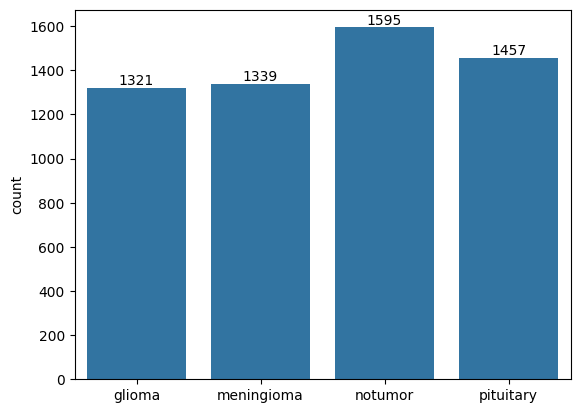

In [ ]:
ax = sns.countplot(x = target)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
df = pd.DataFrame({'Images':data,'Target':target})
df.head()

,Images,Target
0,D:\Brain_Tumor\Training\glioma\Tr-glTr_0000.jpg,glioma
1,D:\Brain_Tumor\Training\glioma\Tr-glTr_0001.jpg,glioma
2,D:\Brain_Tumor\Training\glioma\Tr-glTr_0002.jpg,glioma
3,D:\Brain_Tumor\Training\glioma\Tr-glTr_0003.jpg,glioma
4,D:\Brain_Tumor\Training\glioma\Tr-glTr_0004.jpg,glioma


In [ ]:
df.shape

(5712, 2)

In [ ]:
df1 = df.sample(frac = 1)
df1.head()

,Images,Target
711,D:\Brain_Tumor\Training\glioma\Tr-gl_0711.jpg,glioma
1473,D:\Brain_Tumor\Training\meningioma\Tr-me_0152.jpg,meningioma
1710,D:\Brain_Tumor\Training\meningioma\Tr-me_0389.jpg,meningioma
2581,D:\Brain_Tumor\Training\meningioma\Tr-me_1260.jpg,meningioma
5316,D:\Brain_Tumor\Training\pituitary\Tr-pi_1061.jpg,pituitary


In [ ]:
df1.shape

(5712, 2)

## Sample Images Display

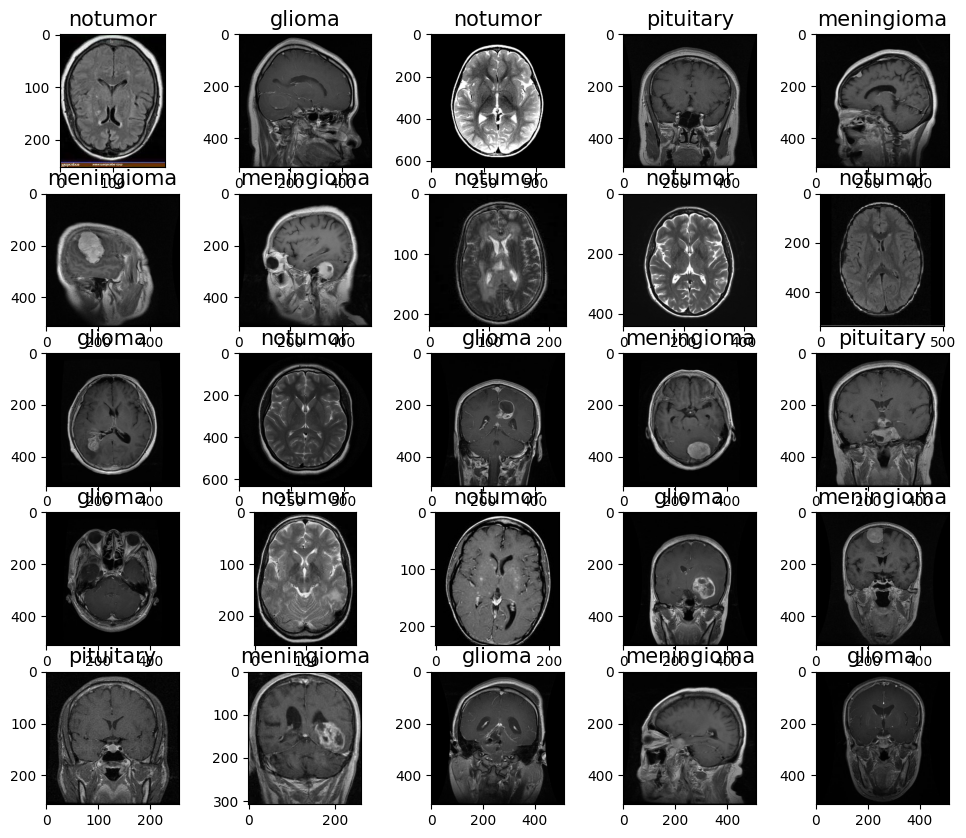

In [ ]:
plt.figure(figsize=(12,10))
for i in range(25):
    idx = np.random.randint(1,5712)
    plt.subplot(5,5,i+1)
    plt.imshow(cv2.imread(df['Images'].iloc[idx]))
    plt.title(f"{df['Target'].iloc[idx]}", size=15)
plt.show()

In [ ]:
cv2.imread(data[5]).shape        # (height = 512, width = 512, color_channel = 3)

(512, 512, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
images = []
for i,j in df1.iterrows():
    path = j['Images']
    imgs = img_to_array(load_img(path, target_size=(128, 128)))
    images.append(imgs)

In [ ]:
len(images)

5712

In [ ]:
[i.shape for i in images]

[(128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 128, 3),
 (128, 1

## 4) Feature and Label Extraction

In [ ]:
df['Target'].value_counts()

Target
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64

In [ ]:
df1['Target'] = df1['Target'].str.lower()
df1['Target'].value_counts()

Target
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64

In [ ]:
# bt = brain_tumor
bt_dict = {'glioma':0,'meningioma':1,'notumor':2,'pituitary':3}
print(bt_dict)

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [ ]:
x = np.array(images)
y = df1['Target'].map(bt_dict)
print(x.shape)
print(y.shape)

(5712, 128, 128, 3)
(5712,)


In [ ]:
y

711     0
1473    1
1710    1
2581    1
5316    3
       ..
1347    1
5448    3
5002    3
1530    1
2130    1
Name: Target, Length: 5712, dtype: int64

## 5) Train-Test Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(3998, 128, 128, 3) (1714, 128, 128, 3)
(3998,) (1714,)


## 6) Apply the following CNN Architectures

### a) Vanilla CNN

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
from tensorflow.keras.models import Sequential

In [ ]:
# Build the model
m1 = Sequential()
m1.add(Input(shape=(128, 128, 3)))
m1.add(Conv2D(64, (3, 3), activation='relu'))
m1.add(MaxPooling2D(2, 2))

m1.add(Conv2D(128, (3, 3), activation='relu'))
m1.add(MaxPooling2D(2, 2))

m1.add(Conv2D(256, (3, 3), activation='relu'))
m1.add(MaxPooling2D(2, 2))

m1.add(Conv2D(256, (3, 3), activation='relu'))
m1.add(MaxPooling2D(2, 2))

m1.add(Flatten())
m1.add(Dense(256,activation='relu'))
m1.add(Dense(5,activation='softmax'))

m1.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['acc'])
m1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,321,733 (12.67 MB)

 Trainable params: 3,321,733 (12.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
h1 = m1.fit(x_train, y_train,epochs=10 , validation_data=(x_test,y_test))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - acc: 0.5369 - loss: 14.6152 - val_acc: 0.7835 - val_loss: 0.6335
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - acc: 0.8281 - loss: 0.4837 - val_acc: 0.8279 - val_loss: 0.5051
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - acc: 0.8852 - loss: 0.3380 - val_acc: 0.8646 - val_loss: 0.3798
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - acc: 0.9060 - loss: 0.2563 - val_acc: 0.8833 - val_loss: 0.3608
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - acc: 0.9313 - loss: 0.1832 - val_acc: 0.8967 - val_loss: 0.3203
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - acc: 0.9466 - loss: 0.1463 - val_acc: 0.8781 - val_loss: 0.3670
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - acc: 0.9489 - loss: 0.1429 - val_acc: 0.8944 - val_loss: 0.2935
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - acc: 0.9624 - loss: 0.1240 - val_acc: 0.8991 - val_loss: 0.3573
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 168s 1s

#### Performance Visualization

In [ ]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,acc,loss,val_acc,val_loss,Epochs
5,0.942471,0.157247,0.878063,0.366986,5
6,0.945723,0.153753,0.894399,0.293495,6
7,0.953227,0.137711,0.899067,0.357305,7
8,0.960730,0.106768,0.903734,0.367669,8
9,0.973987,0.075770,0.911902,0.359642,9


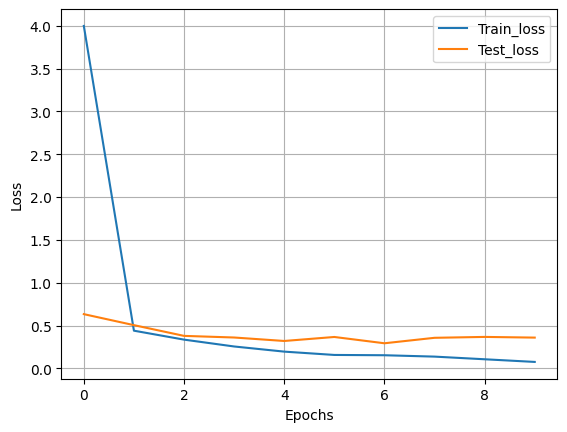

In [ ]:
# Loss vs Epochs
plt.plot(r1['Epochs'],r1['loss'],label='Train_loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

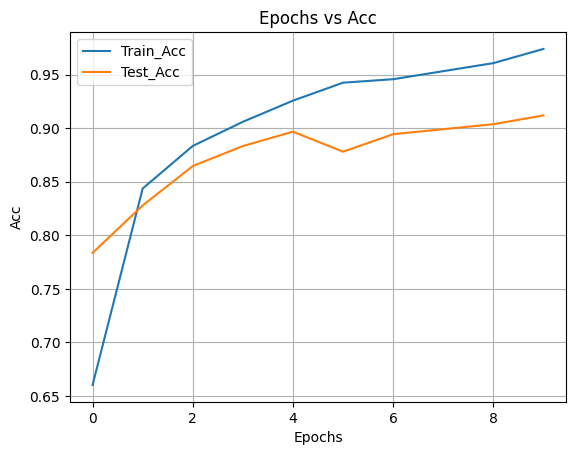

In [ ]:
# Accuracy vs Epochs
plt.plot(r1['Epochs'],r1['acc'],label='Train_Acc')
plt.plot(r1['Epochs'],r1['val_acc'],label='Test_Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Epochs vs Acc')
plt.legend()
plt.grid()
plt.show()

#### Evaluate the Model

In [ ]:
ypred = m1.predict(x_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 299ms/step


In [ ]:
import numpy as np
ypred = m1.predict(x_test)
ypred_m1 = [int(np.argmax(i)) for i in ypred]
print(ypred_m1)

54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 308ms/step
[2, 0, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2, 0, 1, 1, 1, 3, 3, 3, 2, 3, 2, 2, 0, 0, 1, 3, 1, 3, 2, 2, 1, 0, 3, 0, 3, 1, 3, 3, 1, 1, 3, 2, 2, 2, 3, 0, 3, 3, 3, 2, 3, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 3, 1, 2, 3, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 3, 0, 2, 1, 3, 0, 3, 3, 1, 1, 2, 1, 3, 3, 1, 1, 2, 1, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 0, 1, 2, 2, 3, 1, 2, 2, 0, 3, 0, 0, 1, 1, 1, 3, 2, 3, 2, 2, 2, 0, 1, 0, 3, 3, 0, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 2, 3, 2, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 1, 3, 2, 0, 3, 2, 3, 1, 0, 0, 0, 1, 0, 3, 1, 2, 1, 1, 3, 2, 3, 1, 3, 0, 3, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 3, 3, 2, 1, 2, 1, 1, 1, 0, 0, 2, 3, 3, 0, 3, 1, 1, 2, 0, 2, 0, 3, 1, 2, 1, 1, 3, 0, 2, 3, 2, 3, 2, 0, 1, 2, 3, 1, 1, 2, 1, 2, 2, 1, 1, 3, 3, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 3, 0, 2, 1, 0, 2, 1, 0, 3, 3, 3, 2, 1, 3, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1, 3, 3, 2, 1, 2, 0, 2, 2, 3, 0, 3, 0, 2, 2, 3, 3, 0, 2, 3, 0, 1, 1, 3, 3, 1, 2, 2, 2, 2, 1, 3, 0, 2, 3, 3, 0, 2, 1, 3, 3, 2, 3, 

In [ ]:
from sklearn.metrics import *

In [ ]:
print(confusion_matrix(y_test,ypred_m1))
print(classification_report(y_test,ypred_m1))

[[341  46   1   7]
 [ 22 351  24  28]
 [  0   9 464   7]
 [  0   6   1 407]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       395
           1       0.85      0.83      0.84       425
           2       0.95      0.97      0.96       480
           3       0.91      0.98      0.94       414

    accuracy                           0.91      1714
   macro avg       0.91      0.91      0.91      1714
weighted avg       0.91      0.91      0.91      1714



### b) Transfer Learning - VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,813,124 (64.14 MB)

 Trainable params: 2,098,436 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 320s 3s/step - accuracy: 0.9361 - loss: 0.1808 - val_accuracy: 0.9172 - val_loss: 0.3263
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.9310 - loss: 0.1749 - val_accuracy: 0.9347 - val_loss: 0.2861
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.9479 - loss: 0.1595 - val_accuracy: 0.9148 - val_loss: 0.3396
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 369s 3s/step - accuracy: 0.9219 - loss: 0.2182 - val_accuracy: 0.9277 - val_loss: 0.3210
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 387s 3s/step - accuracy: 0.9385 - loss: 0.1713 - val_accuracy: 0.9271 - val_loss: 0.3395
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 382s 3s/step - accuracy: 0.9469 - loss: 0.1299 - val_accuracy: 0.9317 - val_loss: 0.3132
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 369s 3s/step - accuracy: 0.9324 - loss: 0.1705 - val_accuracy: 0.9306 - val_loss: 0.3232
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 423s 3s/step - accuracy: 0.9366 - loss: 0.1756 - val_accu

In [ ]:
r2 = pd.DataFrame(history.history)
r2['Epochs'] = history.epoch
r2.tail()

,accuracy,loss,val_accuracy,val_loss,Epochs
5,0.938969,0.164623,0.931739,0.313212,5
6,0.927714,0.177216,0.930572,0.323201,6
7,0.938969,0.166384,0.921237,0.383193,7
8,0.943222,0.146306,0.923571,0.373691,8
9,0.943722,0.157215,0.932905,0.357425,9


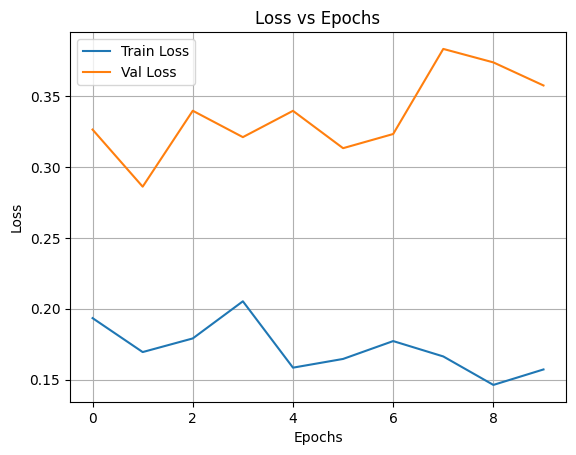

In [ ]:
# Loss vs Epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

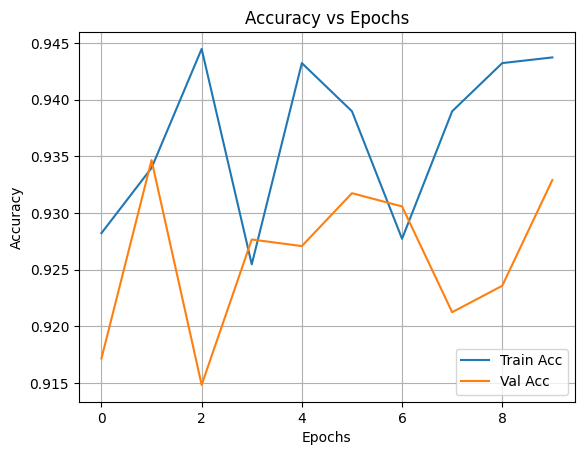

In [ ]:
# Accuracy vs Epochs
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

#### Evaluate the Model

In [ ]:
y_pred_probs = model.predict(x_test)
ypred_m2 = [int(np.argmax(i)) for i in y_pred_probs]
print(ypred_m2)

54/54 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step 
[2, 0, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2, 0, 1, 1, 1, 3, 3, 3, 2, 3, 2, 1, 0, 0, 1, 3, 1, 3, 2, 2, 1, 0, 1, 0, 3, 1, 1, 3, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 3, 0, 3, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 3, 1, 2, 3, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 3, 0, 2, 1, 3, 0, 3, 3, 1, 1, 2, 1, 3, 3, 0, 1, 1, 1, 2, 0, 1, 3, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 0, 1, 2, 2, 3, 1, 2, 2, 0, 3, 0, 0, 1, 1, 1, 3, 2, 1, 2, 2, 2, 0, 0, 0, 3, 3, 0, 3, 2, 3, 1, 3, 2, 3, 1, 2, 0, 2, 1, 2, 3, 1, 1, 2, 0, 0, 3, 3, 3, 3, 1, 3, 2, 0, 3, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 2, 1, 1, 3, 2, 3, 2, 3, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 1, 2, 0, 3, 3, 2, 3, 2, 1, 0, 1, 0, 0, 2, 3, 3, 0, 3, 1, 1, 2, 0, 2, 0, 3, 2, 2, 1, 1, 3, 1, 2, 3, 2, 3, 2, 0, 3, 2, 3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 3, 0, 2, 1, 0, 2, 1, 0, 3, 3, 3, 3, 1, 3, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 3, 3, 2, 0, 2, 0, 2, 2, 3, 0, 3, 0, 2, 2, 3, 3, 1, 2, 3, 0, 0, 1, 3, 3, 1, 2, 2, 2, 2, 1, 3, 0, 2, 3, 3, 0, 2, 1, 3, 3, 2, 3, 2,

In [ ]:
from sklearn.metrics import *

In [ ]:
print(confusion_matrix(y_test,ypred_m2))
print(classification_report(y_test,ypred_m2))

[[362  29   1   3]
 [ 23 377  10  15]
 [  3   8 463   6]
 [  0  17   0 397]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       395
           1       0.87      0.89      0.88       425
           2       0.98      0.96      0.97       480
           3       0.94      0.96      0.95       414

    accuracy                           0.93      1714
   macro avg       0.93      0.93      0.93      1714
weighted avg       0.93      0.93      0.93      1714



## 7) Best Model Selection
<pre>
   After testing both, we found that VGG16 performed better. It gave a higher accuracy of 93%, while the Vanilla CNN gave 91%. VGG16 also had better F1-scores for all tumor types and showed more accurate results on new images.
</pre>

## 8) Final Prediction on Test Dataset

### Transfer Learning - VGG16

In [ ]:
y_test_array = y_test.to_numpy()
ypred_m2_array = ypred_m2
print("\nVGG16 Predictions:")
for i in range(5):
    print(f"Actual: {class_names[y_test_array[i]]}, Predicted: {class_names[ypred_m2_array[i]]}")


VGG16 Predictions:
Actual: pituitary, Predicted: pituitary
Actual: glioma, Predicted: glioma
Actual: no_tumor, Predicted: no_tumor
Actual: no_tumor, Predicted: no_tumor
Actual: no_tumor, Predicted: no_tumor


## 9) Interactive Image Prediction Interface
<pre>
   When an image is selected, the program automatically resizes and processes it, just like it did during training. It then uses my trained VGG16 model to analyze the image and predict whether there is a brain tumor, and if so, what type it might be.
To make the output easy to understand, I designed a bar graph that shows the model’s confidence in each of the four classes: Glioma Tumor, Meningioma Tumor, Pituitary Tumor, and No Tumor.
</pre>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
class_names = ['glioma', 'meningioma', 'pituitary', 'no_tumor']
def predict_and_plot(img_path, model, actual_label=None):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    predicted_label = class_names[predicted_class]
    if actual_label is not None:
        actual_label_text = class_names[actual_label]
        title_text = f"Actual: {actual_label_text} | Predicted: {predicted_label}"
    else:
        title_text = f"Predicted: {predicted_label}"
    plt.figure(figsize=(8, 5))
    bars = plt.bar(class_names, predictions[0], color='skyblue')
    bars[predicted_class].set_color('green')
    if actual_label is not None:
        bars[actual_label].set_color('orange')
    plt.title(title_text)
    plt.ylabel('Prediction Probability')
    plt.ylim([0, 1])
    for i, val in enumerate(predictions[0]):
        plt.text(i, val + 0.01, f'{val:.2f}', ha='center', fontsize=10)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


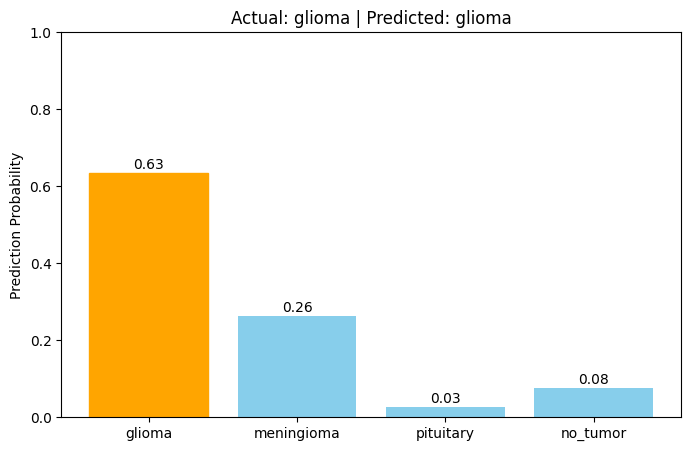

In [ ]:
# For VGG16 model
predict_and_plot("D:/Brain_Tumor/Training/glioma/Tr-glTr_0000.jpg", model, actual_label=0)

## Conclusion
<pre>
   This project helped me understand how artificial intelligence can be used to detect brain tumors from MRI images. I learned how to prepare the image data, build different CNN models, and test which one works best. After comparing the results, I chose VGG16 as my final model because it gave higher accuracy and more reliable predictions.I also created a function that allows anyone to upload one image and see the predicted tumor type in a simple chart. This made my project more useful and user-friendly.
</pre>